In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_oneresult_sen_de.csv")
df

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.887,0.095539,0.061869,0.134083,0.100413,0.770882
1,0.888,0.093382,0.060608,0.132206,0.099431,0.776471
2,0.889,0.091324,0.059205,0.130456,0.098338,0.782647
3,0.890,0.089363,0.058174,0.128716,0.097527,0.787059
4,0.891,0.086667,0.056453,0.126387,0.096174,0.794412
5,0.892,0.084118,0.055007,0.124103,0.094993,0.799706
6,0.893,0.082500,0.054021,0.122721,0.094241,0.804412
7,0.894,0.079755,0.052200,0.120270,0.092714,0.810294
8,0.895,0.077206,0.050519,0.118015,0.091328,0.816176
9,0.896,0.075392,0.049058,0.116554,0.090219,0.823235


In [50]:
dfw = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_oneresult_word_de.csv")
dfw

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.805,0.090686,0.060436,0.130377,0.100127,0.793824
1,0.806,0.089265,0.059526,0.129088,0.099350,0.796471
2,0.807,0.087500,0.058408,0.127529,0.098438,0.800588
3,0.808,0.086275,0.057831,0.126451,0.098007,0.803529
4,0.809,0.084167,0.056537,0.124578,0.096949,0.808235
5,0.810,0.082647,0.055573,0.123235,0.096161,0.811765
6,0.811,0.079608,0.053533,0.120520,0.094445,0.818235
7,0.812,0.077157,0.051831,0.118319,0.092993,0.823235
8,0.813,0.075147,0.050666,0.116559,0.092078,0.828235
9,0.814,0.072990,0.049219,0.114681,0.090910,0.833824


In [44]:
dfn = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_nresult_de.csv")
dfn

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.890,0.094118,0.061329,0.132941,0.100152,0.776471
1,0.891,0.091716,0.059751,0.130892,0.098928,0.783529
2,0.892,0.089265,0.058354,0.128691,0.097781,0.788529
3,0.893,0.087941,0.057500,0.127574,0.097132,0.792647
4,0.894,0.085539,0.055926,0.125451,0.095838,0.798235
5,0.895,0.082843,0.054143,0.123064,0.094364,0.804412
6,0.896,0.081029,0.052682,0.121603,0.093255,0.811471
7,0.897,0.078284,0.050824,0.119167,0.091706,0.817647
8,0.898,0.075980,0.049427,0.117157,0.090604,0.823529
9,0.899,0.074216,0.048261,0.115613,0.089658,0.827941


In [14]:
dfo = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_one.csv")
dfnb = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/test_nbest.csv")

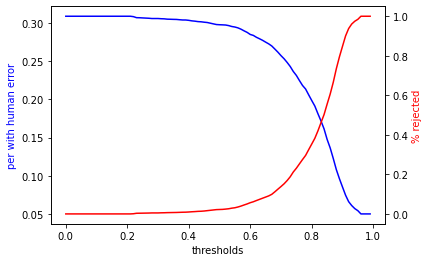

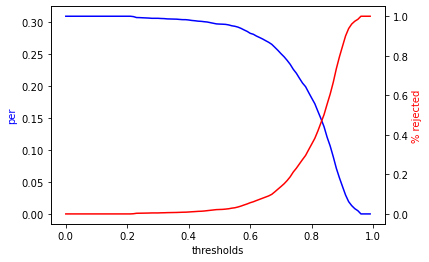

In [22]:
#dfo_per

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfo[dfo['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfo.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfo[dfo['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfo.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfo.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

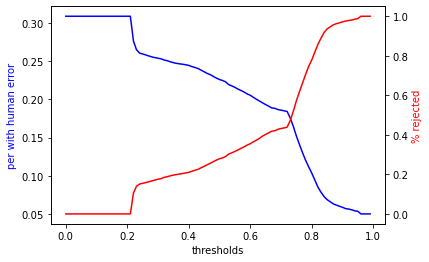

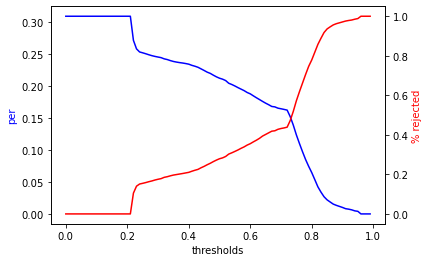

In [24]:
#dfo_word

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfo[dfo['min_word_confidence'] < threshold].shape[0]
    rej_percent = reject / dfo.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfo[dfo['min_word_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfo.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfo.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

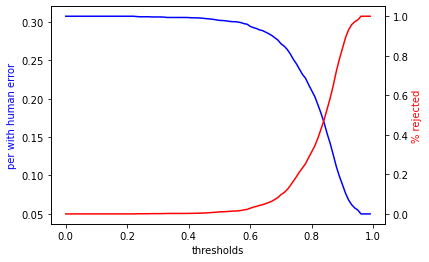

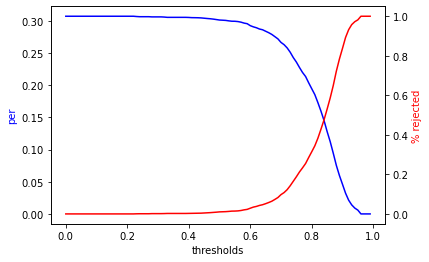

In [53]:
#dfnb_per

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfnb[dfnb['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfnb.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfnb[dfnb['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfnb.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfnb.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)

    while allper == 0.05:
        print (threshold, rej_percent)
    while overallper == 0.1:
        print (threshold, rej_percent)
    
    threshold += 0.01
    

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, human_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

In [57]:
dfm = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_male.csv")
dff = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_female.csv")
# dfm.describe()
dff.describe()

,sentence_confidence,min_word_confidence,wer,per
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.810423,0.628276,0.466771,0.287740
std,0.107619,0.222992,0.245004,0.175215
min,0.220455,0.216675,0.000000,0.000000
25%,0.764901,0.471992,0.333333,0.176471
50%,0.840922,0.738192,0.500000,0.263158
75%,0.882442,0.792135,0.666667,0.388889
max,0.954677,0.954677,1.166667,1.000000


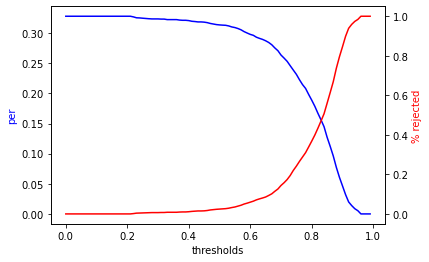

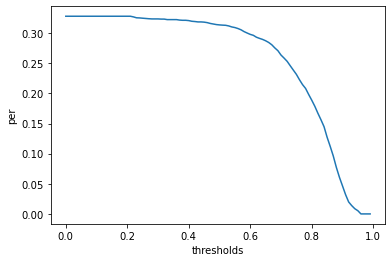

In [71]:
#dfm

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfm[dfm['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfm.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfm[dfm['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dfm.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfm.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, human_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per with human error', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

plt.plot(thresholds, ave_per)
plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()

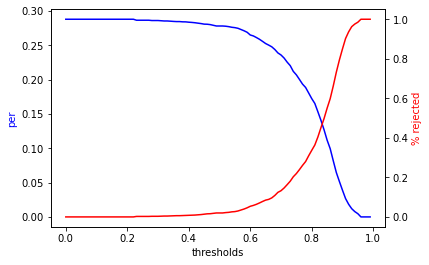

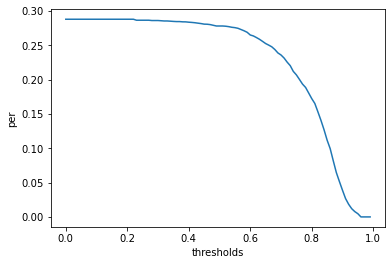

In [70]:
#dff

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dff[dff['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dff.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dff[dff['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / dff.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dff.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, human_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per with human error', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(thresholds, ave_per, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

plt.plot(thresholds, ave_per)
plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()


In [63]:
dfmd = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_result_male.csv")
dfmd

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.811,0.083241,0.057760,0.124185,0.098705,0.818889
1,0.812,0.080000,0.055490,0.121222,0.096712,0.824444
2,0.813,0.077778,0.054267,0.119250,0.095739,0.829444
3,0.814,0.075833,0.052636,0.117583,0.094386,0.835000
4,0.815,0.074074,0.051290,0.116046,0.093262,0.839444
5,0.816,0.072963,0.050500,0.115019,0.092555,0.841111
6,0.817,0.071111,0.048952,0.113472,0.091313,0.847222
7,0.818,0.070556,0.048545,0.113000,0.090990,0.848889
8,0.819,0.070000,0.048026,0.112556,0.090581,0.851111
9,0.820,0.067870,0.046509,0.110648,0.089287,0.855556


In [66]:
dffd = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv/adaptation/gender/test_result_female.csv")
dffd

,threshold,ave_wer,ave_per,human_wer,human_per,rej_percents
0,0.801,0.092708,0.059198,0.131521,0.098011,0.776250
1,0.802,0.091875,0.058806,0.130844,0.097774,0.779375
2,0.803,0.090000,0.057597,0.129219,0.096816,0.784375
3,0.804,0.088021,0.056296,0.127427,0.095702,0.788125
4,0.805,0.086146,0.054906,0.125802,0.094562,0.793125
5,0.806,0.083438,0.053271,0.123313,0.093146,0.797500
6,0.807,0.081458,0.052048,0.121583,0.092173,0.802500
7,0.808,0.079271,0.051062,0.119646,0.091437,0.807500
8,0.809,0.077917,0.050378,0.118510,0.090971,0.811875
9,0.810,0.076667,0.049571,0.117448,0.090352,0.815625


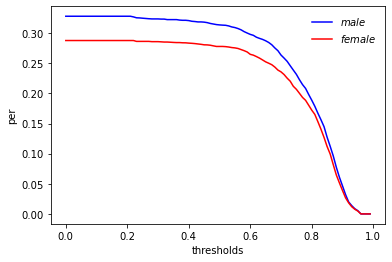

In [88]:
#dfm_dff

thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
rej_percents1 = []
acc_per1 = []
ave_per1 = []
human_per1 = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = dfm[dfm['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / dfm.shape[0]
    rej_percents.append(rej_percent)
    
    accept = dfm[dfm['sentence_confidence'] > threshold]['per'].to_list()
    
    reject1 = dff[dff['sentence_confidence'] < threshold].shape[0]
    rej_percent1 = reject1 / dff.shape[0]
    rej_percents1.append(rej_percent1)
    accept1 = dff[dff['sentence_confidence'] > threshold]['per'].to_list()
    
    # average overall WER
    allper = sum(accept) / dfm.shape[0]
    ave_per.append(allper)
    
    allper1 = sum(accept1) / dff.shape[0]
    ave_per1.append(allper1)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / dfm.shape[0]
    human_per.append(overallper)
    
    human_error1 = reject1 * 0.05
    overallper1 = (sum(accept1) + human_error1) / dff.shape[0]
    human_per1.append(overallper1)
    
    threshold += 0.01


# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.plot(thresholds, ave_per, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('per', color='b')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

plt.plot(thresholds, ave_per, color='b', label='$male$') 
hl=plt.legend(loc='upper right', frameon=False)                
plt.plot(thresholds, ave_per1, color='r', label='$female$')
plt.legend(loc='upper right', frameon=False)                

plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()

# plt.plot(thresholds, rej_percents, color='b', label='$male$') 
# hl=plt.legend(loc='upper right', frameon=False)                
# plt.plot(thresholds, rej_percents1, color='r', label='$female$')
# plt.legend(loc='upper right', frameon=False)                

# plt.xlabel('thresholds')
# plt.ylabel('% rejected')
# plt.show()